<a href="https://colab.research.google.com/github/SeishiroInoue/diveintocode_machine_learning/blob/main/scikit_learn_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 問題1

"""
何を学習し、何を予測するのか
"""
電話会社や取引情報などのさまざまな代替データを利用して、クライアントの返済能力を予測

"""
どのようなファイルを作りKaggleに提出するか
"""
テストセットの各SK_ID_CURRについて、TARGET変数の確率を予測したファイル

"""
提出されたものはどういった指標値で評価されるのか
"""
ROC曲線面積で評価する

In [1]:
# 問題2,3

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from scipy import stats

In [2]:
df = pd.read_csv("/content/application_train.csv")

In [3]:
print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19395 entries, 0 to 19394
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(85), int64(21), object(16)
memory usage: 18.1+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     2608
AMT_REQ_CREDIT_BUREAU_WEEK    2608
AMT_REQ_CREDIT_BUREAU_MON     2608
AMT_REQ_CREDIT_BUREAU_QRT     2608
AMT_REQ_CREDIT_BUREAU_YEAR    2608
Length: 122, dtype: int64

In [5]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [6]:
df[df.columns[df.dtypes == "object"]]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19390,Cash loans,F,Y,Y,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,Medicine staff,FRIDAY,Medicine,NaN,block of flats,Block,No
19391,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,FRIDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
19392,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Cooking staff,TUESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
19393,Revolving loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,FRIDAY,Self-employed,NaN,NaN,NaN,NaN


In [7]:
for column in df.columns[df.dtypes == "object"]:
    print("オブジェクトのユニーク : {}".format(df[column].unique()))
    print("数 : {}\n".format(len(df[column].unique())))

オブジェクトのユニーク : ['Cash loans' 'Revolving loans']
数 : 2

オブジェクトのユニーク : ['M' 'F']
数 : 2

オブジェクトのユニーク : ['N' 'Y']
数 : 2

オブジェクトのユニーク : ['Y' 'N']
数 : 2

オブジェクトのユニーク : ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
数 : 8

オブジェクトのユニーク : ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student']
数 : 6

オブジェクトのユニーク : ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
数 : 5

オブジェクトのユニーク : ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated']
数 : 5

オブジェクトのユニーク : ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
数 : 6

オブジェクトのユニーク : ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty ag

In [8]:
df_obj = df.select_dtypes(include = ['object'])
for col_obj in df_obj.columns:
    df[col_obj] = df[col_obj].fillna(df_obj[col_obj].mode()[0])

df_num = df.select_dtypes(include = ['float64', 'int64'])
for col_num in df_num.columns:
    df[col_num] = df[col_num].fillna(df_num[col_num].mean())

In [9]:
df.select_dtypes(include = ['object']).isnull().sum().sum()

0

In [10]:
df.select_dtypes(include = ['float64', 'int64']).isnull().sum().sum()

0

In [11]:
df.isnull().sum().sum()

0

In [12]:
df_dummy = list(df.select_dtypes(include='object').columns)
df = pd.concat([df, pd.get_dummies(df[df_dummy])], axis = 1, sort = False)
df.drop(columns = df[df_dummy], inplace = True)

In [13]:
df.shape

(19395, 242)

In [14]:
df_test = pd.read_csv("application_test.csv")

print(df_test.info())
display(df_test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
for column in df_test.columns[df_test.dtypes == "object"]:
    print("オブジェクトのユニーク : {}".format(df_test[column].unique()))
    print("数 : {}\n".format(len(df_test[column].unique())))

オブジェクトのユニーク : ['Cash loans' 'Revolving loans']
数 : 2

オブジェクトのユニーク : ['F' 'M']
数 : 2

オブジェクトのユニーク : ['N' 'Y']
数 : 2

オブジェクトのユニーク : ['Y' 'N']
数 : 2

オブジェクトのユニーク : ['Unaccompanied' nan 'Family' 'Spouse, partner' 'Group of people'
 'Other_B' 'Children' 'Other_A']
数 : 8

オブジェクトのユニーク : ['Working' 'State servant' 'Pensioner' 'Commercial associate'
 'Businessman' 'Student' 'Unemployed']
数 : 7

オブジェクトのユニーク : ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
数 : 5

オブジェクトのユニーク : ['Married' 'Single / not married' 'Civil marriage' 'Widow' 'Separated']
数 : 5

オブジェクトのユニーク : ['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
数 : 6

オブジェクトのユニーク : [nan 'Low-skill Laborers' 'Drivers' 'Sales staff' 'High skill tech staff'
 'Core staff' 'Laborers' 'Managers' 'Accountants' 'Medicine staff'
 'Security staff' 'Private service staff' 'Secretaries' 'Cleaning staff'
 'Cooking staff' 'HR s

In [16]:
df_test_obj = df_test.select_dtypes(include = ['object'])
for col_test_obj in df_test_obj.columns:
    df_test[col_test_obj] = df_test[col_test_obj].fillna(df_test_obj[col_test_obj].mode()[0])

df_test_num = df_test.select_dtypes(include = ['float64', 'int64'])
for col_test_num in df_test_num.columns:
    df_test[col_test_num] = df_test[col_test_num].fillna(df_test_num[col_test_num].mean())

df_test.isnull().sum().sum()

0

In [17]:
df_test_dummy = list(df_test.select_dtypes(include='object').columns)
df_test = pd.concat([df_test, pd.get_dummies(df_test[df_test_dummy])], axis = 1, sort = False)
df_test.drop(columns = df_test[df_test_dummy], inplace = True)

In [18]:
print(df.shape)
print(df_test.shape)

(19395, 242)
(48744, 242)


In [19]:
for column_df in df.columns:
    if column_df not in df_test.columns:
        df_test[column_df] = 0

for column_test in df_test.columns:
    if column_test not in df.columns:
        df[column_test] = 0

df_test.drop(columns="TARGET", inplace=True)

print(df.shape)
print(df_test.shape)

(19395, 243)
(48744, 242)


In [20]:
from sklearn.model_selection import train_test_split

y = df[["TARGET"]].copy()
df.drop(columns = "TARGET", inplace = True)
X = df.copy()

X_array = X.values
y_array = y.values

X_train, X_valid, y_train, y_valid = train_test_split(
    X_array, y_array, test_size=0.25, random_state=0)

X_test = df_test.values

In [21]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_std = scaler_X.fit_transform(X_train)
X_valid_std = scaler_X.transform(X_valid)
X_test_std = scaler_X.transform(X_test)

y_train = np.ravel(y_train)
y_valid = np.ravel(y_valid)

In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def ml_def(X_tr, y_tr, X_va, y_va, model):

    model.fit(X_tr, y_tr)
    y_train_predict_model = model.predict_proba(X_tr)

    fpr_train_model, tpr_train_model, thresholds_train_model = roc_curve(y_tr, y_train_predict_model[:, 1])
    print('train\nfpr：', fpr_train_model)
    print('tpr：', tpr_train_model)
    print('thresholds：', thresholds_train_model)
    print("roc_auc_score : ", roc_auc_score(y_tr, y_train_predict_model[:, 1]))

    y_valid_predict_model = model.predict_proba(X_va)
    fpr_valid_model, tpr_valid_model, thresholds_valid_model = roc_curve(y_va, y_valid_predict_model[:, 1])
    print('\nvalid\nfpr：', fpr_valid_model)
    print('tpr：', tpr_valid_model)
    print('thresholds：', thresholds_valid_model)
    print("roc_auc_score : ", roc_auc_score(y_va, y_valid_predict_model[:, 1]))
    
    plt.figure()
    plt.plot(fpr_train_model, tpr_train_model, marker='o')
    plt.xlabel('FPR: False positive rate')
    plt.ylabel('TPR: True positive rate')
    plt.title('TRAIN')
    plt.grid()
    
    plt.figure()
    plt.plot(fpr_valid_model, tpr_valid_model, marker='o')
    plt.xlabel('FPR: False positive rate')
    plt.ylabel('TPR: True positive rate')
    plt.title('VALID')
    plt.grid();

train
fpr： [0. 0. 1.]
tpr： [0. 1. 1.]
thresholds： [2. 1. 0.]
roc_auc_score :  1.0

valid
fpr： [0.         0.08445642 1.        ]
tpr： [0.         0.16120907 1.        ]
thresholds： [2. 1. 0.]
roc_auc_score :  0.538376321965505


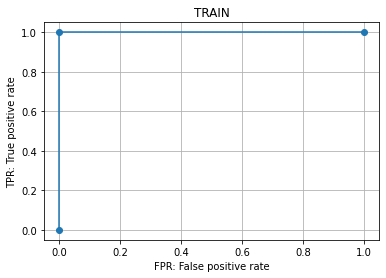

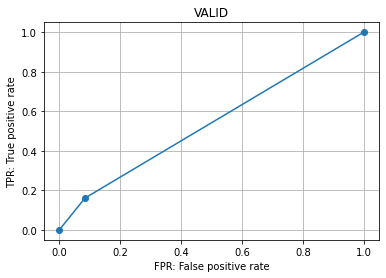

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
ml_def(X_train_std, y_train, X_valid_std, y_valid, dtree)

In [24]:
fti_dtree = dtree.feature_importances_

feat_dict_dtree = sorted(dict(zip(fti_dtree, df.columns)).items())
feat_dict_dtree

[(0.0, 'NAME_INCOME_TYPE_Businessman'),
 (9.345505348017185e-05, 'WALLSMATERIAL_MODE_Block'),
 (0.00012236756701617456, 'ORGANIZATION_TYPE_Postal'),
 (0.00015747442896507242, 'ORGANIZATION_TYPE_Industry: type 12'),
 (0.00019552162457573633, 'FLAG_DOCUMENT_18'),
 (0.00020392881389216997, 'ORGANIZATION_TYPE_Agriculture'),
 (0.00027393871830572235, 'ORGANIZATION_TYPE_Transport: type 4'),
 (0.000274121567863967, 'OCCUPATION_TYPE_Security staff'),
 (0.00028087532285192747, 'NONLIVINGAPARTMENTS_MODE'),
 (0.00028355042824198184, 'FLAG_CONT_MOBILE'),
 (0.0002900867164826131, 'FLAG_DOCUMENT_19'),
 (0.00029627327154606753, 'ORGANIZATION_TYPE_Industry: type 9'),
 (0.00031029351706054337, 'FLAG_DOCUMENT_5'),
 (0.0003734594253998869, 'ORGANIZATION_TYPE_Telecom'),
 (0.0004240469586963281, 'NAME_INCOME_TYPE_Pensioner'),
 (0.00043164311788526107, 'ORGANIZATION_TYPE_Industry: type 1'),
 (0.00044722114785971463, 'ORGANIZATION_TYPE_Military'),
 (0.0004522917470643415, 'OCCUPATION_TYPE_IT staff'),
 (0.000

train
fpr： [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.45156483e-05
 3.72578241e-04 5.96125186e-04 1.34128167e-03 2.45901639e-03
 3.72578241e-03 6.40834575e-03 1.00596125e-02 1.67660209e-02
 2.79433681e-02 4.01639344e-02 6.44560358e-02 9.81371088e-02
 1.53129657e-01 2.32861401e-01 3.38822653e-01 4.90089419e-01
 6.81222057e-01 8.69523100e-01 1.00000000e+00]
tpr： [0.00000000e+00 8.88099467e-04 3.55239787e-03 7.10479574e-03
 8.88099467e-03 1.77619893e-02 2.75310835e-02 4.52930728e-02
 5.59502664e-02 1.07460036e-01 1.52753108e-01 2.10479574e-01
 2.73534636e-01 3.3570

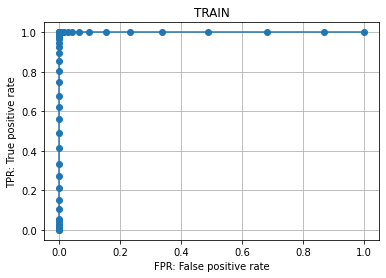

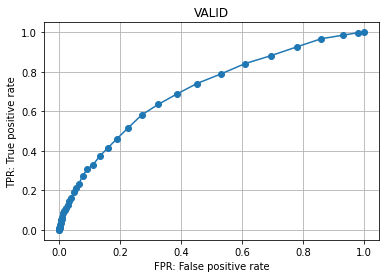

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
ml_def(X_train_std, y_train, X_valid_std, y_valid, rfc)

In [26]:
fti_rfc = rfc.feature_importances_

feat_dict_rfc = sorted(dict(zip(fti_rfc, df.columns)).items())
feat_dict_rfc

[(0.0, 'NAME_INCOME_TYPE_Businessman'),
 (3.943727995554697e-06, 'NAME_EDUCATION_TYPE_Academic degree'),
 (9.052080698911186e-06, 'FLAG_DOCUMENT_21'),
 (9.851230677555319e-06, 'FLAG_DOCUMENT_15'),
 (1.0922760036297492e-05, 'FLAG_DOCUMENT_17'),
 (1.6385354905910134e-05, 'ORGANIZATION_TYPE_Hotel'),
 (2.41275455319267e-05, 'WALLSMATERIAL_MODE_Monolithic'),
 (3.431199787122767e-05, 'FLAG_DOCUMENT_14'),
 (5.5834868444427e-05, 'ORGANIZATION_TYPE_Emergency'),
 (6.798554534333404e-05, 'ORGANIZATION_TYPE_Culture'),
 (8.523796203081881e-05, 'ORGANIZATION_TYPE_Trade: type 1'),
 (8.558003123685527e-05, 'ORGANIZATION_TYPE_Industry: type 4'),
 (8.940372870069469e-05, 'NAME_TYPE_SUITE_Group of people'),
 (9.57985109162133e-05, 'FLAG_DOCUMENT_11'),
 (0.00011549676874617462, 'ORGANIZATION_TYPE_Trade: type 2'),
 (0.0001258779996854625, 'ORGANIZATION_TYPE_Trade: type 6'),
 (0.00017527022264582332, 'ORGANIZATION_TYPE_Legal Services'),
 (0.00018429177381591768, 'OCCUPATION_TYPE_HR staff'),
 (0.000201672043

train
fpr： [0.00000000e+00 0.00000000e+00 7.45156483e-05 2.23546945e-04
 3.72578241e-04 9.68703428e-04 1.41579732e-03 2.38450075e-03
 3.12965723e-03 3.57675112e-03 4.76900149e-03 6.63189270e-03
 7.07898659e-03 8.86736215e-03 1.02831595e-02 1.11773472e-02
 1.56482861e-02 1.60953800e-02 2.09388972e-02 2.31743666e-02
 4.59761550e-02 4.94038748e-02 5.80476900e-02 5.88673621e-02
 1.23994039e-01 1.25931446e-01 1.33755589e-01 1.92697466e-01
 1.97168405e-01 2.21609538e-01 2.28315946e-01 3.69672131e-01
 3.73397914e-01 3.75484352e-01 3.77645306e-01 4.76676602e-01
 6.11177347e-01 6.14679583e-01 6.36363636e-01 6.86736215e-01
 6.91579732e-01 6.98882265e-01 7.89269747e-01 8.08345753e-01
 1.00000000e+00]
tpr： [0.         0.52042629 0.52575488 0.53108348 0.53463588 0.54351687
 0.54973357 0.56127886 0.56838366 0.57193606 0.57992895 0.59147425
 0.59413854 0.60124334 0.60568384 0.60834813 0.62078153 0.62166963
 0.63055062 0.63410302 0.6687389  0.6731794  0.68294849 0.68383659
 0.75399645 0.75577265 0.762

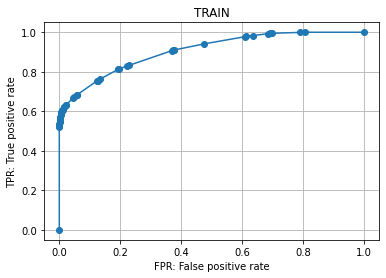

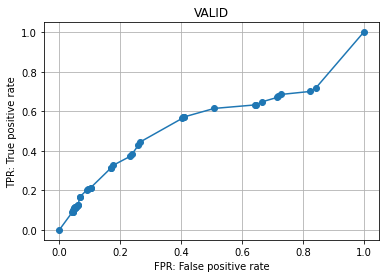

In [27]:
# 問題4

dtree_depth15 = DecisionTreeClassifier(max_depth=15)
ml_def(X_train_std, y_train, X_valid_std, y_valid, dtree_depth15)

train
fpr： [0.00000000e+00 0.00000000e+00 0.00000000e+00 7.45156483e-05
 7.45156483e-05 1.49031297e-04 1.49031297e-04 2.23546945e-04
 2.23546945e-04 2.98062593e-04 2.98062593e-04 3.72578241e-04
 3.72578241e-04 4.47093890e-04 4.47093890e-04 6.70640835e-04
 6.70640835e-04 1.26676602e-03 1.26676602e-03 1.86289121e-03
 1.86289121e-03 2.23546945e-03 2.23546945e-03 2.38450075e-03
 2.38450075e-03 2.53353204e-03 2.53353204e-03 2.83159463e-03
 2.83159463e-03 6.85543964e-03 6.85543964e-03 1.63189270e-02
 1.63189270e-02 4.98509687e-02 4.98509687e-02 8.99403875e-02
 8.99403875e-02 1.00000000e+00]
tpr： [0.00000000e+00 8.88099467e-04 9.65364121e-01 9.65364121e-01
 9.72468917e-01 9.72468917e-01 9.73357016e-01 9.73357016e-01
 9.85790409e-01 9.85790409e-01 9.86678508e-01 9.86678508e-01
 9.89342806e-01 9.89342806e-01 9.90230906e-01 9.90230906e-01
 9.91119005e-01 9.91119005e-01 9.92007105e-01 9.92007105e-01
 9.92895204e-01 9.92895204e-01 9.93783304e-01 9.93783304e-01
 9.94671403e-01 9.94671403e-01 9.9555

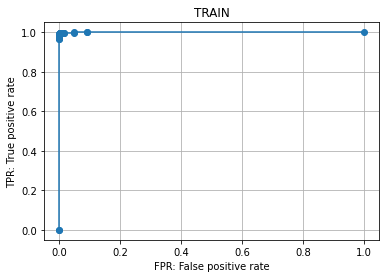

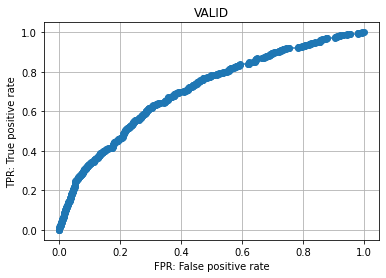

In [28]:
rfc_20 = RandomForestClassifier(max_depth=20)
ml_def(X_train_std, y_train, X_valid_std, y_valid, rfc_20)

In [29]:
import sklearn
def ml_def_gs(X_tr, y_tr, X_va, y_va, param, model):

    licv=sklearn.model_selection.GridSearchCV(model,
                                              param_grid=param, cv=5, n_jobs=-1,scoring='roc_auc')
    licv.fit(X_tr, y_tr)
    predictor=licv.best_estimator_
    
    y_train_predict=predictor.predict_proba(X_tr)

    fpr_train_model, tpr_train_model, thresholds_train_model = roc_curve(y_tr, y_train_predict[:, 1])
    print('train\nfpr：', fpr_train_model)
    print('tpr：', tpr_train_model)
    print('thresholds：', thresholds_train_model)
    print("roc_auc_score : ", roc_auc_score(y_tr, y_train_predict[:, 1]))
    
    y_valid_predict=predictor.predict_proba(X_va)

    fpr_valid_model, tpr_valid_model, thresholds_valid_model = roc_curve(y_va, y_valid_predict[:, 1])
    print('\nvalid\nfpr：', fpr_valid_model)
    print('tpr：', tpr_valid_model)
    print('thresholds：', thresholds_valid_model)
    print("roc_auc_score : ", roc_auc_score(y_va, y_valid_predict[:, 1]))
         
    plt.figure()
    plt.plot(fpr_train_model, tpr_train_model, marker='o')
    plt.xlabel('FPR: False positive rate')
    plt.ylabel('TPR: True positive rate')
    plt.title('TRAIN')
    plt.grid()
    
    plt.figure()
    plt.plot(fpr_valid_model, tpr_valid_model, marker='o')
    plt.xlabel('FPR: False positive rate')
    plt.ylabel('TPR: True positive rate')
    plt.title('VALID')
    plt.grid();
    
    print(sorted(predictor.get_params(True).items()))
    
    print(predictor.feature_importances_)

train
fpr： [0.00000000e+00 0.00000000e+00 2.23546945e-04 3.72578241e-04
 1.26676602e-03 2.60804769e-03 2.98062593e-03 1.47540984e-02
 2.64530551e-02 2.66766021e-02 4.41132638e-02 4.61997019e-02
 6.22950820e-02 6.45305514e-02 7.74217586e-02 8.74813711e-02
 1.13189270e-01 1.99552906e-01 3.76900149e-01 3.84649776e-01
 3.92995529e-01 3.94336811e-01 6.04918033e-01 6.06482861e-01
 7.20417288e-01 7.45305514e-01 1.00000000e+00]
tpr： [0.         0.01687389 0.02131439 0.02397869 0.03907638 0.05506217
 0.05861456 0.13587922 0.19715808 0.19804618 0.25932504 0.26554174
 0.30817052 0.31349911 0.34191829 0.35790409 0.39698046 0.50888099
 0.70959147 0.71758437 0.72468917 0.72557726 0.85257549 0.85346359
 0.91385435 0.92628774 1.        ]
thresholds： [2.         1.         0.625      0.6        0.5862069  0.5
 0.44444444 0.35510204 0.30530973 0.25       0.22772277 0.2
 0.18181818 0.16666667 0.15609756 0.11764706 0.11311054 0.09805447
 0.08672295 0.07964602 0.06666667 0.05263158 0.04816437 0.04545455
 0

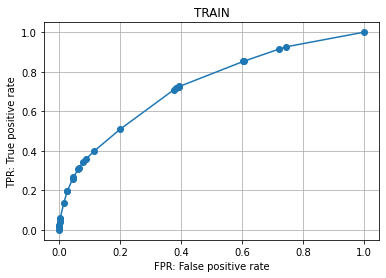

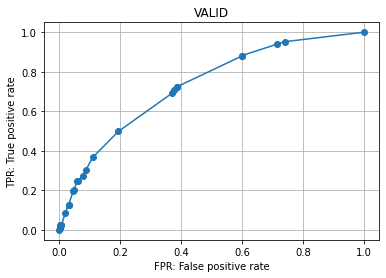

In [30]:
diparameter_dtree={"min_samples_leaf":[i for i in range(1, 9, 1)], "max_depth":[i for i in range(5, 10, 1)], "random_state":[123],}

ml_def_gs(X_train_std, y_train, X_valid_std, y_valid, diparameter_dtree, DecisionTreeClassifier())

train
fpr： [0.         0.         0.         ... 0.87511177 0.87511177 1.        ]
tpr： [0.00000000e+00 8.88099467e-04 1.16341030e-01 ... 9.99111901e-01
 1.00000000e+00 1.00000000e+00]
thresholds： [1.51084758 0.51084758 0.25617591 ... 0.04242536 0.04241924 0.01972236]
roc_auc_score :  0.9246159730843655

valid
fpr： [0.00000000e+00 2.24618149e-04 6.73854447e-04 6.73854447e-04
 8.98472597e-04 8.98472597e-04 1.34770889e-03 1.34770889e-03
 1.79694519e-03 1.79694519e-03 2.02156334e-03 2.02156334e-03
 2.24618149e-03 2.24618149e-03 2.47079964e-03 2.47079964e-03
 3.59389039e-03 3.59389039e-03 4.04312668e-03 4.04312668e-03
 4.49236298e-03 4.49236298e-03 5.16621743e-03 5.16621743e-03
 6.28930818e-03 6.28930818e-03 6.51392633e-03 6.51392633e-03
 6.73854447e-03 6.73854447e-03 7.41239892e-03 7.41239892e-03
 8.08625337e-03 8.08625337e-03 8.31087152e-03 8.31087152e-03
 8.53548967e-03 8.53548967e-03 9.20934412e-03 9.20934412e-03
 9.43396226e-03 9.43396226e-03 1.01078167e-02 1.01078167e-02
 1.10062893e

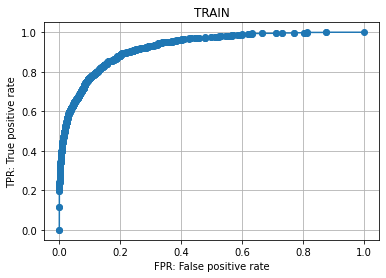

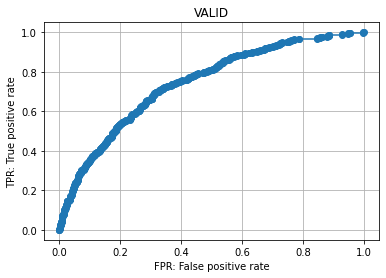

In [31]:
diparameter_rfc={"min_samples_leaf":[i for i in range(1, 9, 1)], "max_depth":[i for i in range(5, 10, 1)], "random_state":[123],}
ml_def_gs(X_train_std, y_train, X_valid_std, y_valid, diparameter_rfc, RandomForestClassifier())

In [ ]:
・過学習が改善された
・やや決定木の方がvalidで良い結果

train
fpr： [0.00000000e+00 0.00000000e+00 7.45156483e-05 1.49031297e-04
 3.72578241e-04 5.21609538e-04 9.68703428e-04 1.41579732e-03
 9.83606557e-03 1.00596125e-02 1.12518629e-02 1.87779434e-02
 1.91505216e-02 2.59314456e-02 2.61549925e-02 2.83904620e-02
 3.42026826e-02 3.45007452e-02 5.15648286e-02 7.19076006e-02
 7.40685544e-02 7.49627422e-02 7.54843517e-02 8.80774963e-02
 9.29210134e-02 9.53800298e-02 1.51713860e-01 1.55067064e-01
 1.78539493e-01 2.59016393e-01 2.84798808e-01 3.64232489e-01
 3.72727273e-01 5.78017884e-01 5.86363636e-01 7.00149031e-01
 7.02160954e-01 7.22503726e-01 7.29955291e-01 7.34947839e-01
 7.38524590e-01 7.60879285e-01 9.89418778e-01 1.00000000e+00]
tpr： [0.         0.12078153 0.13499112 0.14476021 0.15008881 0.15275311
 0.1598579  0.1651865  0.23268206 0.23445826 0.24156306 0.27886323
 0.28063943 0.30817052 0.30905861 0.31616341 0.3339254  0.3348135
 0.38543517 0.43783304 0.44316163 0.44493783 0.44582593 0.46625222
 0.47335702 0.47690941 0.55417407 0.55861456 

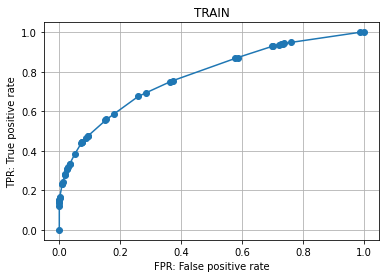

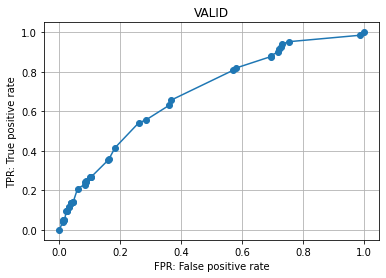

In [32]:
dtree_8_1 = DecisionTreeClassifier(max_depth=8, min_samples_leaf=1)
ml_def(X_train, y_train, X_valid, y_valid, dtree_8_1)

In [ ]:
決定木の場合、スコアは標準化に関係ない

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


train
fpr： [0.00000000e+00 7.45156483e-05 1.49031297e-04 ... 9.95827124e-01
 9.95827124e-01 1.00000000e+00]
tpr： [0.        0.        0.        ... 0.9991119 1.        1.       ]
thresholds： [1.21369931 0.21369931 0.20816901 ... 0.01908706 0.01908361 0.00552069]
roc_auc_score :  0.6220356536862084

valid
fpr： [0.00000000e+00 2.24618149e-04 2.24618149e-04 2.47079964e-03
 2.47079964e-03 2.92003594e-03 2.92003594e-03 3.59389039e-03
 3.59389039e-03 4.26774483e-03 4.26774483e-03 6.06469003e-03
 6.06469003e-03 6.73854447e-03 6.73854447e-03 6.96316262e-03
 6.96316262e-03 1.39263252e-02 1.39263252e-02 1.52740341e-02
 1.52740341e-02 1.61725067e-02 1.61725067e-02 1.63971249e-02
 1.63971249e-02 1.66217430e-02 1.66217430e-02 1.79694519e-02
 1.79694519e-02 1.84186882e-02 1.84186882e-02 2.15633423e-02
 2.15633423e-02 2.17879605e-02 2.17879605e-02 2.26864331e-02
 2.26864331e-02 2.29110512e-02 2.29110512e-02 2.31356694e-02
 2.31356694e-02 2.78526505e-02 2.78526505e-02 2.80772686e-02
 2.80772686e-02 2.

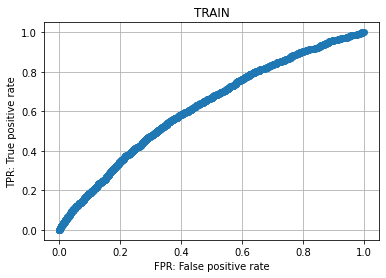

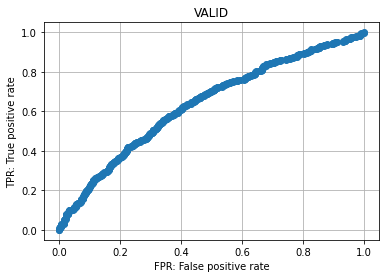

In [33]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(random_state=0)
ml_def(X_train, y_train, X_valid, y_valid, lreg)

train
fpr： [0.00000000e+00 1.49031297e-04 2.98062593e-04 ... 9.91132638e-01
 9.91132638e-01 1.00000000e+00]
tpr： [0.00000000e+00 8.88099467e-04 8.88099467e-04 ... 9.99111901e-01
 1.00000000e+00 1.00000000e+00]
thresholds： [2.00000000e+00 1.00000000e+00 9.99999998e-01 ... 2.32607406e-09
 2.24790302e-09 1.21261697e-52]
roc_auc_score :  0.681010686311621

valid
fpr： [0.00000000e+00 2.24618149e-04 1.12309075e-03 1.12309075e-03
 3.14465409e-03 3.14465409e-03 4.26774483e-03 4.26774483e-03
 4.71698113e-03 4.71698113e-03 6.06469003e-03 6.06469003e-03
 6.51392633e-03 6.51392633e-03 6.73854447e-03 6.73854447e-03
 7.18778077e-03 7.18778077e-03 7.63701707e-03 7.63701707e-03
 8.98472597e-03 8.98472597e-03 1.14555256e-02 1.14555256e-02
 1.16801438e-02 1.16801438e-02 1.23539982e-02 1.23539982e-02
 1.61725067e-02 1.61725067e-02 1.72955975e-02 1.72955975e-02
 1.79694519e-02 1.79694519e-02 1.81940701e-02 1.81940701e-02
 1.84186882e-02 1.84186882e-02 1.86433064e-02 1.86433064e-02
 2.02156334e-02 2.021563

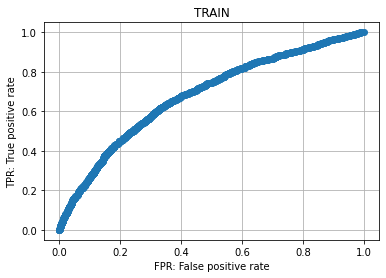

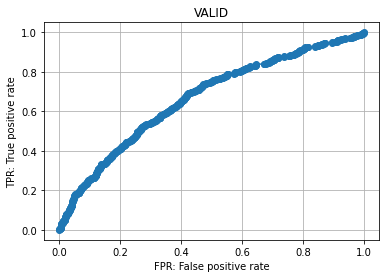

In [34]:
from sklearn import linear_model
sgd_std = linear_model.SGDClassifier(loss="log")
ml_def(X_train_std, y_train, X_valid_std, y_valid, sgd_std)

In [ ]:
・線形回帰では、標準化によりスコアアップ
・ロジスティック回帰が現状最も良い

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

train
fpr： [0.00000000e+00 7.45156483e-05 2.23546945e-04 ... 9.80178838e-01
 9.80178838e-01 1.00000000e+00]
tpr： [0.        0.        0.        ... 0.9991119 1.        1.       ]
thresholds： [1.21603215 0.21603215 0.21326318 ... 0.0405213  0.04051498 0.02751616]
roc_auc_score :  0.7142525405468364

valid
fpr： [0.         0.         0.00112309 0.00112309 0.00224618 0.00224618
 0.00359389 0.00359389 0.00449236 0.00449236 0.0049416  0.0049416
 0.00606469 0.00606469 0.00718778 0.00718778 0.00763702 0.00763702
 0.00898473 0.00898473 0.00965858 0.00965858 0.01010782 0.01010782
 0.01033243 0.01033243 0.01190476 0.01190476 0.01280323 0.01280323
 0.01594789 0.01594789 0.01639712 0.01639712 0.01707098 0.01707098
 0.01819407 0.01819407 0.01864331 0.01864331 0.01931716 0.01931716
 0.01954178 0.01954178 0.0197664  0.0197664  0.01999102 0.01999102
 0.02088949 0.02088949 0.02178796 0.02178796 0.02425876 0.02425876
 0.02448338 0.02448338 0.02493261 0.02493261 0.02515723 0.02515723
 0.02740341 0.027403

AttributeError: ignored

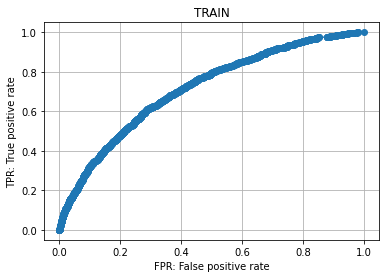

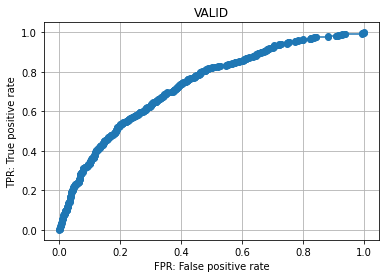

In [35]:
columns_num = []
for value, column in feat_dict_dtree[-10:]:
    columns_num.append(X.columns.get_loc(column))

X_train_std_feat10 = X_train_std[:, columns_num]
X_valid_std_feat10 = X_valid_std[:, columns_num]

diparameter_lreg_feat10={"penalty":["l1", "l2"], "C":[0.00045, 0.0005, 0.00055], "random_state":[3],}
ml_def_gs(X_train_std_feat10, y_train, X_valid_std_feat10, y_valid, diparameter_lreg_feat10, LogisticRegression())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


train
fpr： [0.00000000e+00 0.00000000e+00 1.49031297e-04 ... 9.82116244e-01
 9.82116244e-01 1.00000000e+00]
tpr： [0.00000000e+00 8.88099467e-04 8.88099467e-04 ... 9.99111901e-01
 1.00000000e+00 1.00000000e+00]
thresholds： [1.79952103e+00 7.99521031e-01 6.97263707e-01 ... 3.24290168e-03
 3.23969795e-03 4.16260919e-14]
roc_auc_score :  0.770143776818354

valid
fpr： [0.00000000e+00 2.24618149e-04 8.98472597e-04 8.98472597e-04
 1.79694519e-03 1.79694519e-03 2.24618149e-03 2.24618149e-03
 3.14465409e-03 3.14465409e-03 3.36927224e-03 3.36927224e-03
 3.59389039e-03 3.59389039e-03 3.81850854e-03 3.81850854e-03
 5.16621743e-03 5.16621743e-03 6.73854447e-03 6.73854447e-03
 7.18778077e-03 7.18778077e-03 7.41239892e-03 7.41239892e-03
 8.76010782e-03 8.76010782e-03 9.20934412e-03 9.20934412e-03
 9.65858041e-03 9.65858041e-03 1.30278527e-02 1.30278527e-02
 1.37017071e-02 1.37017071e-02 1.39263252e-02 1.39263252e-02
 1.43755615e-02 1.43755615e-02 1.48247978e-02 1.48247978e-02
 1.61725067e-02 1.617250

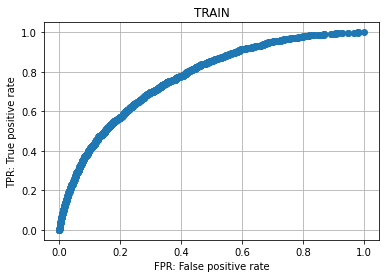

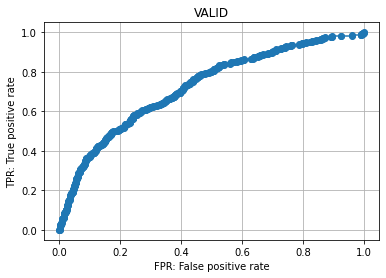

In [36]:
lreg_std_best = LogisticRegression(C=50, penalty="l2")
ml_def(X_train_std, y_train, X_valid_std, y_valid, lreg_std_best)

In [ ]:
・ロジスティック回帰は、重要度高い特徴量に絞ると結果が悪くなる
・Cは５０、ペナルティーはl２でテスト

In [38]:
y_test_predict_proba = lreg_std_best.predict_proba(X_test_std)
y_test_predict_proba

array([[9.99999804e-01, 1.96325525e-07],
       [9.99999770e-01, 2.30431656e-07],
       [9.99999971e-01, 2.93421459e-08],
       ...,
       [8.84812094e-01, 1.15187906e-01],
       [9.38910906e-01, 6.10890943e-02],
       [1.00000000e+00, 1.24894870e-12]])

In [39]:
test_submit_df = pd.concat([df_test["SK_ID_CURR"], pd.DataFrame(y_test_predict_proba[:, 1])], axis=1)
test_submit_df.head()

,SK_ID_CURR,0
0,100001,1.963255e-07
1,100005,2.304317e-07
2,100013,2.934215e-08
3,100028,4.016167e-08
4,100038,1.283561e-07


In [40]:
test_submit_df = test_submit_df.rename(columns={0:"TARGET"})
test_submit_df = test_submit_df.set_index("SK_ID_CURR")
test_submit_df.head()

,TARGET
SK_ID_CURR,
100001,1.963255e-07
100005,2.304317e-07
100013,2.934215e-08
100028,4.016167e-08
100038,1.283561e-07


In [41]:
test_submit_df.to_csv("/content/submit_220414.csv")

In [42]:
pd.read_csv("/content/submit_220414.csv").head()

,SK_ID_CURR,TARGET
0,100001,1.963255e-07
1,100005,2.304317e-07
2,100013,2.934215e-08
3,100028,4.016167e-08
4,100038,1.283561e-07
